In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
dataset=pd.read_csv(r'C:\Users\Gamenote\Downloads\Country-data (1).csv')

In [3]:
df=dataset.copy()

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.set_index('country',inplace=True)

In [6]:
df.tail()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


<AxesSubplot:>

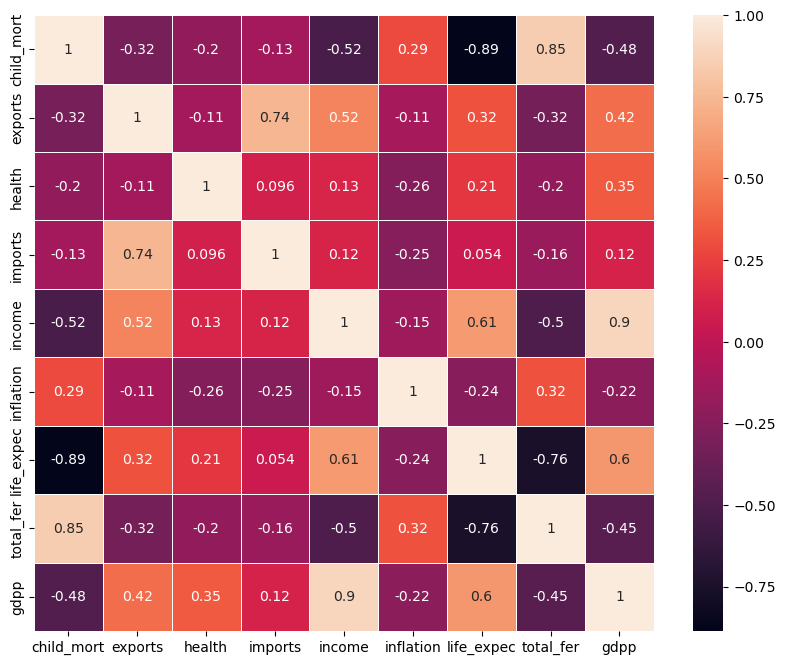

In [7]:
corr=df.corr()
fig, ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

In [8]:
X_cols = df.columns

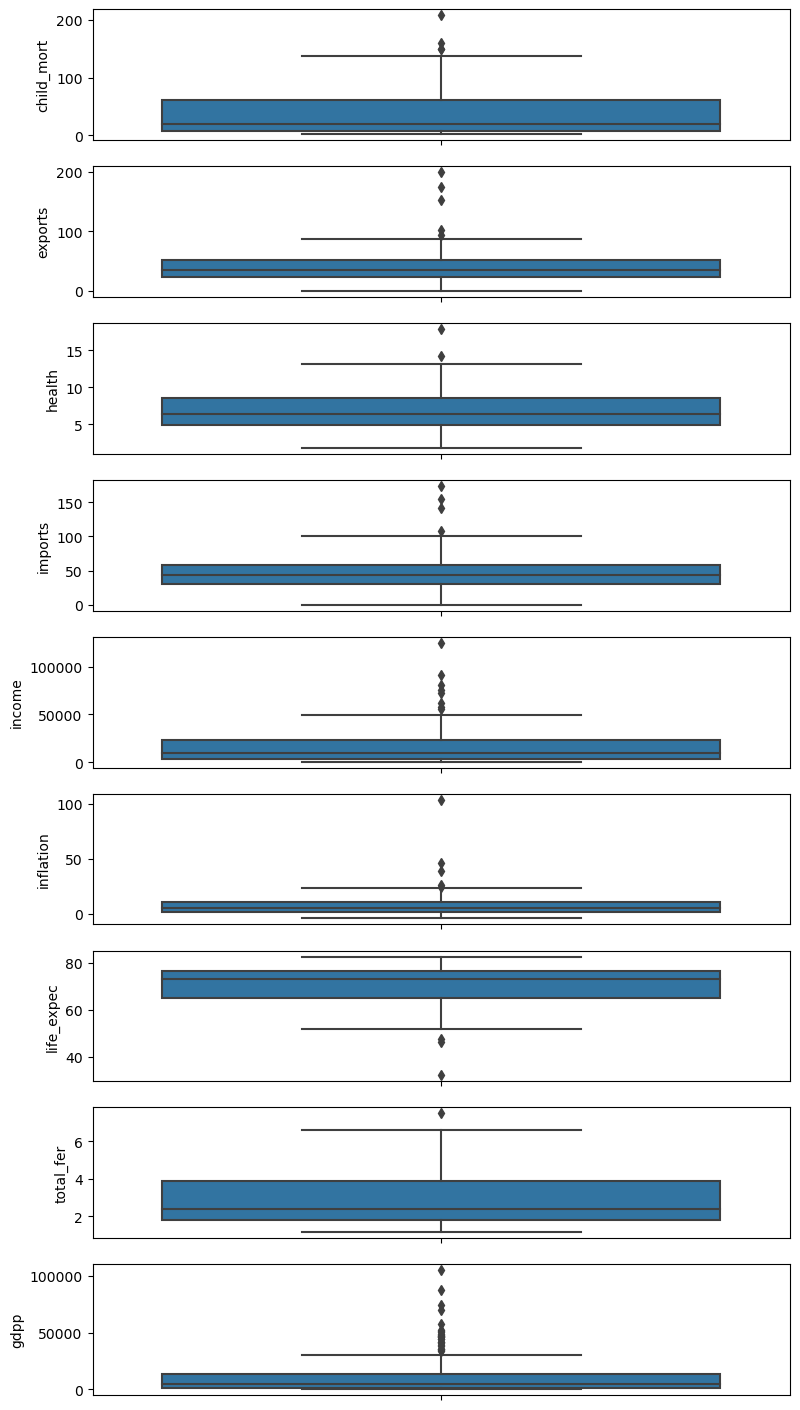

In [9]:
fig, axes = plt.subplots(nrows=len(X_cols),figsize=(9,18))
for i in range(len(X_cols)):
    sns.boxplot(ax=axes[i],y=X_cols[i],data=df)

In [10]:
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

In [11]:
for cols in X_cols:
    upper_bound,lower_bound = outlier_detection(df[cols])
    df[cols] = np.clip(df[cols],a_min=lower_bound,a_max=upper_bound)

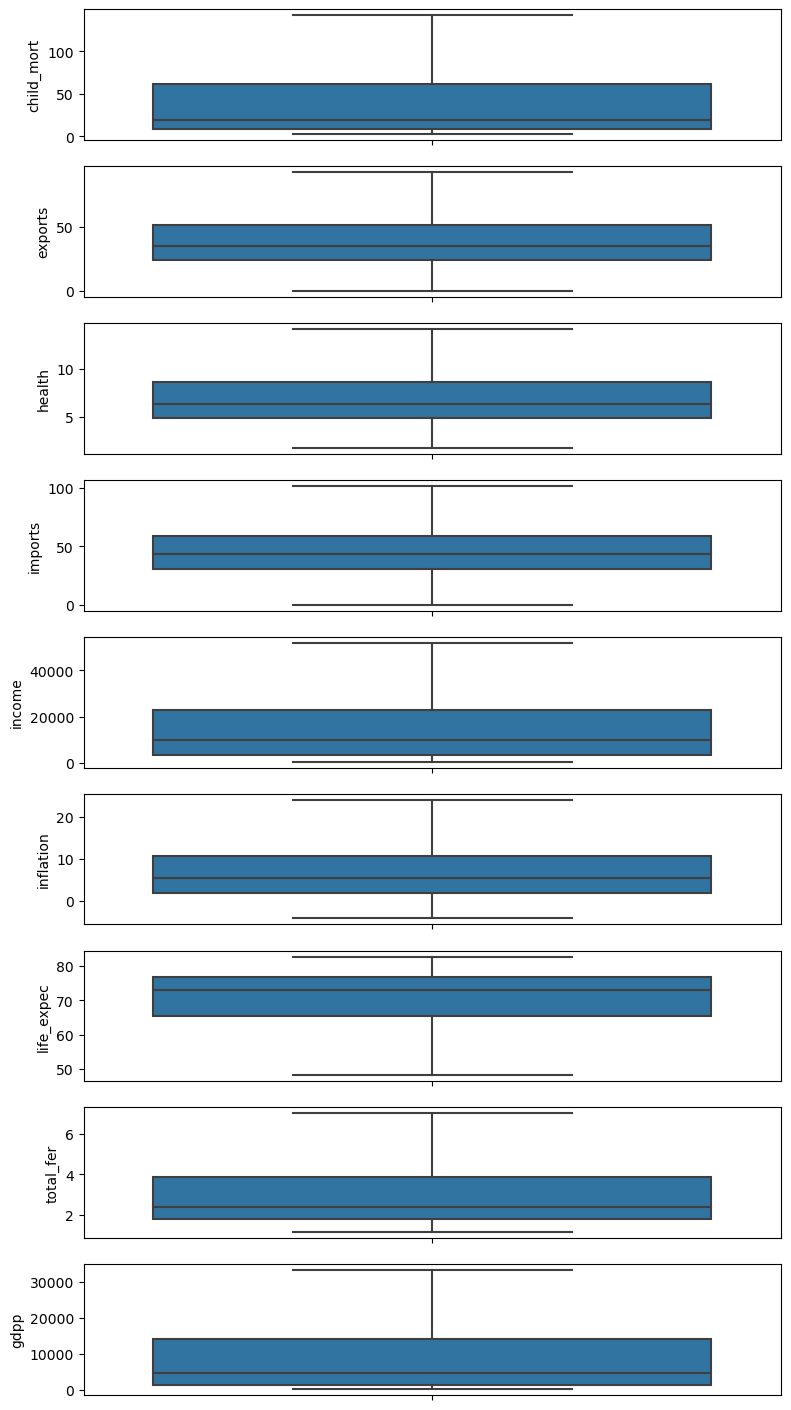

In [12]:
fig,axes = plt.subplots(nrows=len(df.columns),figsize=(9,18))
for i in range(len(df.columns)):
    sns.boxplot(data=df,ax=axes[i],y=df.columns[i])

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
df_cols = df.columns
df = scaler.fit_transform(df)
df = pd.DataFrame(data=df,columns=df_cols)

In [15]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [17]:
k_means=KMeans(n_clusters=3,random_state=123).fit(df)

In [18]:
k_means.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [19]:
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [20]:
df_final=dataset.copy()

In [21]:
df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [22]:
df_final['K_Means_clusters']=k_means.labels_

In [23]:
df_final[df_final['K_Means_clusters']==0].head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0


In [24]:
df_final['K_Means_clusters'].replace({0:"Develped",
                                    1:"Developing",
                                    2:'Underdeveloped'},inplace=True)

In [25]:
df_final.head(100).tail(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters
90,Lithuania,6.1,65.3,7.04,67.2,21100,2.38,73.2,1.50,12000,Developing
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000,Develped
92,"Macedonia, FYR",10.4,39.8,7.09,58.1,11400,2.04,74.0,1.47,4540,Developing
93,Madagascar,62.2,25.0,3.77,43.0,1390,8.79,60.8,4.60,413,Underdeveloped
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,Underdeveloped
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.27,74.5,2.15,9070,Developing
96,Maldives,13.2,77.6,6.33,65.4,10500,2.88,77.9,2.23,7100,Developing
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,Underdeveloped
98,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100,Develped
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.90,68.2,4.98,1200,Underdeveloped


In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward').fit_predict(df)


In [28]:
df_final["Hierachical_clusters"]=hc

In [29]:
hc

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2], dtype=int64)

In [30]:
df_final[df_final["Hierachical_clusters"]==0].head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters,Hierachical_clusters
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Developing,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Develped,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Develped,0


In [31]:
df_final['Hierachical_clusters'].replace({0:"Develped",
                                    1:"Developing",
                                    2:'Underdeveloped'},inplace=True)

In [32]:
import json

In [33]:
world_countries=json.load(open("cs.json","r"))

In [34]:
state_id_map={}
for feature in world_countries['features']:
    feature["id"] = feature["properties"]["ISO_A3"]
    state_id_map[feature["properties"]["ADMIN"]] = feature["id"]

In [35]:
 state_id_map

{'Aruba': 'ABW',
 'Afghanistan': 'AFG',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Albania': 'ALB',
 'Aland': 'ALA',
 'Andorra': 'AND',
 'United Arab Emirates': 'ARE',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'American Samoa': 'ASM',
 'Antarctica': 'ATA',
 'Ashmore and Cartier Islands': '-99',
 'French Southern and Antarctic Lands': 'ATF',
 'Antigua and Barbuda': 'ATG',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Burundi': 'BDI',
 'Belgium': 'BEL',
 'Benin': 'BEN',
 'Burkina Faso': 'BFA',
 'Bangladesh': 'BGD',
 'Bulgaria': 'BGR',
 'Bahrain': 'BHR',
 'The Bahamas': 'BHS',
 'Bosnia and Herzegovina': 'BIH',
 'Bajo Nuevo Bank (Petrel Is.)': '-99',
 'Saint Barthelemy': 'BLM',
 'Belarus': 'BLR',
 'Belize': 'BLZ',
 'Bermuda': 'BMU',
 'Bolivia': 'BOL',
 'Brazil': 'BRA',
 'Barbados': 'BRB',
 'Brunei': 'BRN',
 'Bhutan': 'BTN',
 'Botswana': 'BWA',
 'Central African Republic': 'CAF',
 'Canada': 'CAN',
 'Switzerland': 'CHE',
 'Chile': 'CHL',
 'China': 'CHN',
 'Ivory Coast': 'CIV',


In [36]:
df_final["country"].replace({"Bahamas":"The Bahamas",
                            "Congo, Dem. Rep.":'Democratic Republic of the Congo',
                            "Cote d'Ivoire":"Ivory Coast",
                            "Guinea-Bissau":"Guinea Bissau",
                            "Kyrgyz Republic":"Kyrgyzstan",
                            "Lao":"Laos",
                            'Congo, Rep.':'Republic of Congo',
                            "Macedonia, FYR":"Macedonia", 
                            'Micronesia, Fed. Sts.':'Federated States of Micronesia',
                            'Serbia':'Republic of Serbia',
                            'Slovak Republic':'Slovakia',
                            'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
                            'Tanzania':'United Republic of Tanzania',
                            'Timor-Leste':'East Timor',
                            'United States':'United States of America'},inplace=True)

In [37]:
df.head(100).tail(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
90,-0.824415,1.212784,0.093013,1.052279,0.341549,-0.700847,0.298486,-0.962709,0.142411
91,-0.910514,2.501781,0.367439,2.747480,2.377449,-0.515353,1.251766,-0.876103,1.967546
92,-0.712226,0.012075,0.111810,0.603513,-0.298225,-0.751708,0.392637,-0.982695,-0.501958
93,0.639266,-0.684807,-1.136263,-0.141143,-0.958446,0.258036,-1.160856,1.102512,-0.858434
94,1.377629,-0.788398,-0.076153,-0.540594,-0.982190,0.753184,-2.067061,1.575514,-0.854460
95,-0.777452,2.229856,-0.903189,1.239676,0.341549,0.030656,0.451481,-0.529679,-0.110673
96,-0.639172,1.791950,-0.173894,0.963512,-0.357586,-0.626051,0.851623,-0.476383,-0.280834
97,2.590841,-0.788398,-0.681393,-0.530731,-0.926787,-0.403159,-1.313852,2.401602,-0.832953
98,-0.806152,2.501781,0.698253,2.747480,0.816433,-0.483939,1.134077,-1.055977,0.928436
99,1.557654,0.525319,-0.895670,0.756389,-0.831151,1.770408,-0.289959,1.355668,-0.790455


In [38]:
df_final["state_id"] = df_final["country"].apply(lambda x: state_id_map[x])

In [39]:
import plotly.express as px

In [40]:
df_final.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'K_Means_clusters',
       'Hierachical_clusters', 'state_id'],
      dtype='object')

In [41]:
import plotly.io as pio
pio.renderers.default='browser'

In [42]:
fig=px.choropleth(df_final,
                  locations='state_id',
                  geojson=world_countries, 
                  color='K_Means_clusters',
                  hover_name='country',
                  hover_data=['child_mort', 'exports', 'health', 'imports', 'income',
                              'inflation', 'life_expec', 'total_fer', 'gdpp', 'K_Means_clusters',
                              'Hierachical_clusters'])

In [43]:
fig=px.choropleth(df_final,
                  locations='state_id',
                  geojson=world_countries, 
                  color='Hierachical_clusters',
                  hover_name='country',
                  hover_data=['child_mort', 'exports', 'health', 'imports', 'income',
                              'inflation', 'life_expec', 'total_fer', 'gdpp', 'K_Means_clusters',
                              'Hierachical_clusters'])

In [44]:
from sklearn.decomposition import PCA


In [45]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [46]:
social_score=['child_mort','health','life_expec','total_fer']
economy_score=['exports','imports','imports','inflation','gdpp']

In [47]:
pca = PCA(n_components = 1)

In [48]:
pca_social=pca.fit_transform(df[social_score])
pca_social=pd.DataFrame(data=pca_social,columns=['social_score'])
pca_economy=pca.fit_transform(df[economy_score])
pca_economy=pd.DataFrame(data=pca_economy,columns=['economy_score'])

In [49]:
df_pca=pd.concat([pca_economy,pca_social,df_final],axis=1)

In [50]:
df_pca.head(5)

,economy_score,social_score,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters,Hierachical_clusters,state_id
0,-0.950261,2.755081,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped,Underdeveloped,AFG
1,-0.084573,-1.153072,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developing,ALB
2,-1.295734,-0.364122,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Developing,DZA
3,-0.363352,3.416022,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped,Underdeveloped,AGO
4,1.131818,-1.063376,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Develped,ATG


In [51]:
#pip install pycountry
import plotly.express as px
import pycountry

In [52]:
pycountry.countries

In [53]:
df_pca

,economy_score,social_score,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters,Hierachical_clusters,state_id
0,-0.950261,2.755081,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped,Underdeveloped,AFG
1,-0.084573,-1.153072,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developing,ALB
2,-1.295734,-0.364122,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Developing,DZA
3,-0.363352,3.416022,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped,Underdeveloped,AGO
4,1.131818,-1.063376,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Develped,ATG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.631260,0.699861,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Developing,Develped,VUT
163,-2.513015,-0.657505,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Developing,Developing,VEN
164,2.374801,-0.751371,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Developing,Develped,VNM
165,-1.658527,1.252279,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Underdeveloped,Underdeveloped,YEM


In [54]:
iso3_to_iso2={c.name:c.alpha_2 for c in pycountry.countries}
df_sc=df_pca
df_sc['iso_alpha2']=df_sc['country'].map(iso3_to_iso2)

In [55]:
fig = px.scatter(
    df_sc,
    x="economy_score",
    y="social_score", 
    hover_name='country',
    hover_data=['Hierachical_clusters','K_Means_clusters','child_mort', 'exports', 'health', 'imports',
                                                   'inflation', 'life_expec', 'total_fer', 'gdpp'])
fig.update_traces(marker_color='rgba(0,0,0,0)')

In [56]:
for i, row in df_sc.iterrows():
    country_iso = row["iso_alpha2"]
    fig.add_layout_image(
        dict(source=f'https://github.com/matahombres/CSS-Country-Flags-Rounded/blob/cd06762b18dabd9eff030f9c3c65e101fbc76ba8/flags.css',
             xref='x',
             yref='y',
             xanchor='center',
             yanchor='middle',
             x=row['economy_score'],
             sizex=0.4,
             sizey=0.4,
             y=row['social_score'],
             sizing='contain',
             opacity=1,
             layer='above')
    )
fig.update_layout(height=600,width=1000,plot_bgcolor="#dfdfdf")
fig.show()